In [0]:
from skimage import color
from skimage import io
import skimage as sm
import numpy as np
from matplotlib import pyplot as plt

#Loading Images

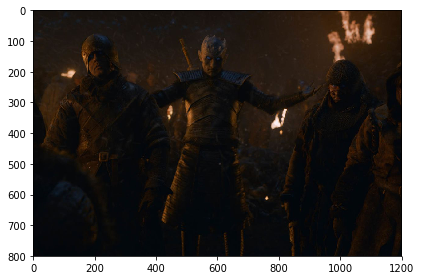

In [0]:
origimg = io.imread('DarkImage.jpg')
io.imshow(origimg)

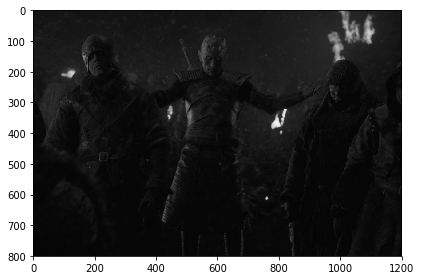

In [0]:
img = color.rgb2gray(io.imread('DarkImage.jpg'))
#Image is a 550 x 309 image
io.imshow(img)

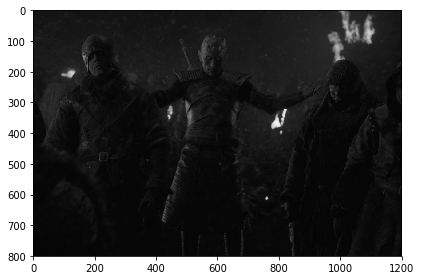

In [0]:
floatImage = sm.img_as_float(img)
io.imshow(floatImage)

In [0]:
matrixImage = np.asarray(floatImage)
print(matrixImage.max())
print(matrixImage.min())

0.9615572549019608
0.0005654901960784314


In [0]:
matrixImage = matrixImage*255
print(matrixImage.max())
print(matrixImage.min())

245.1971
0.1442


In [0]:
gmin = matrixImage.min()
gmax = matrixImage.max()

#Contrast Stretching

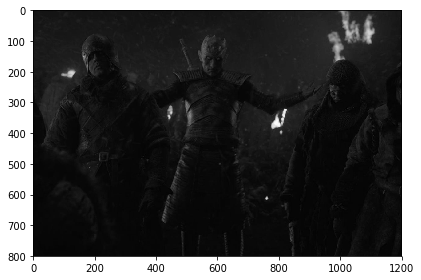

In [0]:
tri = (matrixImage - gmin)/(gmax-gmin)
io.imshow(tri)

#Plotting the histogram

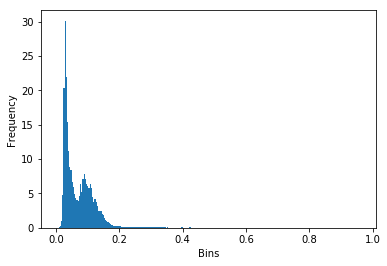

In [0]:
flatten = img.ravel()
hist,bins = np.histogram(flatten, bins = 255, density  = True)
plt.hist(flatten,bins = 255, density = True)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.show()

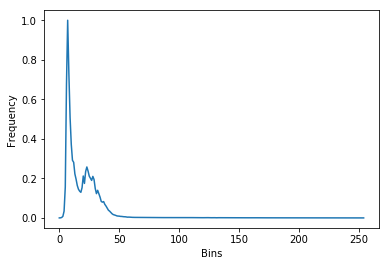

In [0]:
PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(PDF)

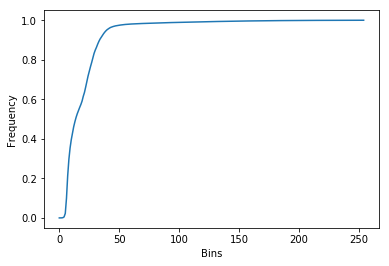

In [0]:
CDF = np.cumsum(hist/np.sum(hist))
plt.xlabel('Bins')
plt.ylabel('Frequency')
CDFplot = plt.plot(CDF)

In [0]:
dimx2,dimy2 = CDFplot[0].get_data()

In [0]:
np.where(CDF == bins[5]*256)

(array([], dtype=int64),)

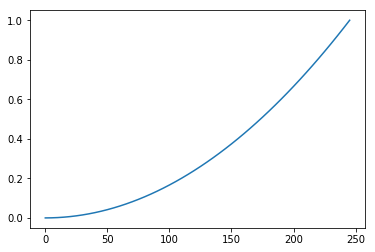

In [0]:
#Square
x = np.linspace(gmin,gmax)
y = (x/gmax)**2
xyplot = plt.plot(x,y)

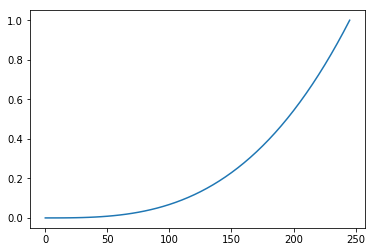

In [0]:
#Cubic
x = np.linspace(gmin,gmax)
y = (x/gmax)**3
xyplot = plt.plot(x,y)

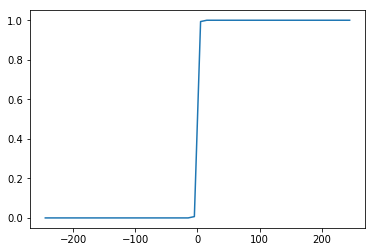

In [0]:
#Logistic Function
x = np.linspace(-gmax,gmax)
yy = (x/gmax)
y = (np.exp(x))/(np.exp(x) + 1)
xyplot = plt.plot(x,y)

In [0]:
dimx3,dimy3 = xyplot[0].get_data()

#Linear

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


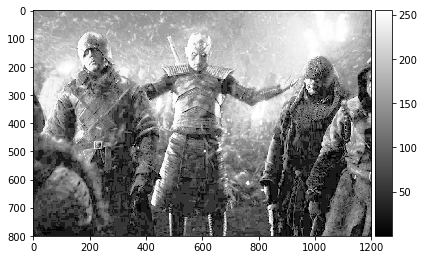

In [0]:
image_linear = np.zeros([np.shape(img)[0],np.shape(img)[1]])
floored = np.floor(matrixImage)

for i in range(len(floored)):
  for j in range(len(floored[i])):
    before = int(floored[i][j])
    percentile = CDF[before]
    desire = percentile*255
    image_linear[i][j] = desire
io.imshow(image_linear, cmap = 'gray')

Text(0, 0.5, 'Frequency')

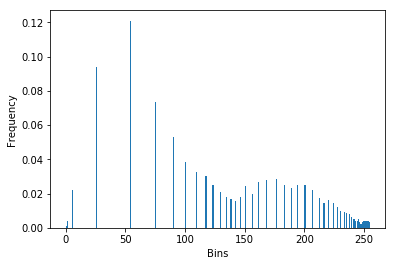

In [0]:
flatten_linear = image_linear.ravel()
hist_l,bins_l = np.histogram(flatten_linear, bins = 255, density  = True)
plt.hist(flatten_linear,bins = 255, density = True ,label = 'Manipulated Histogram')
PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')

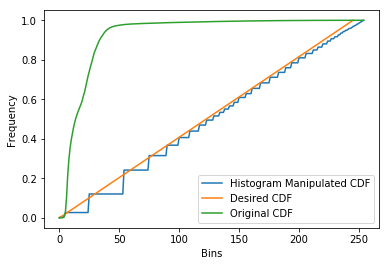

In [0]:
CDF_l = np.cumsum(hist_l/np.sum(hist_l))
plt.plot(CDF_l, label = 'Histogram Manipulated CDF')
x = np.linspace(gmin,gmax)
y = x/gmax
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x,y, label = 'Desired CDF')
CDF = np.cumsum(hist/np.sum(hist))
plt.plot(CDF, label ='Original CDF')
plt.legend()

#Square

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


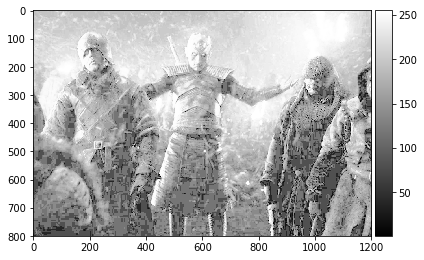

In [0]:
image_sqr = np.zeros([np.shape(img)[0],np.shape(img)[1]])
floored = np.floor(matrixImage)

for i in range(len(floored)):
  for j in range(len(floored[i])):
    before = int(floored[i][j])
    percentile = CDF[before]
    desire = np.sqrt(percentile)*255
    image_sqr[i][j] = desire
io.imshow(image_sqr, cmap = 'gray')

Text(0, 0.5, 'Frequency')

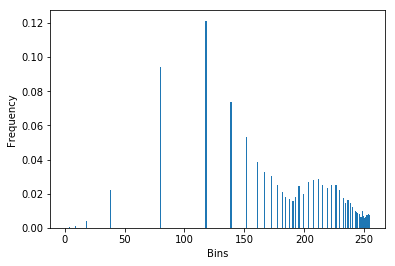

In [0]:
flatten_sqr = image_sqr.ravel()
hist_sq,bins_sq = np.histogram(flatten_sqr, bins = 255, density  = True)
plt.hist(flatten_sqr,bins = 255, density = True ,label = 'Manipulated Histogram')
PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')

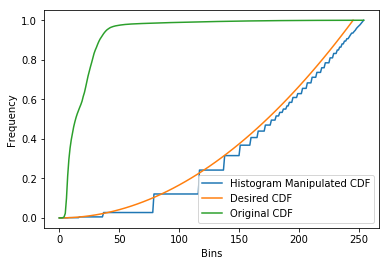

In [0]:
CDF_sqr = np.cumsum(hist_sq/np.sum(hist_sq))
plt.plot(CDF_sqr, label = 'Histogram Manipulated CDF')
x_sqr = np.linspace(gmin,gmax)
y_sqr = (x/gmax)**2
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x_sqr,y_sqr, label = 'Desired CDF')
CDF = np.cumsum(hist/np.sum(hist))
plt.plot(CDF, label ='Original CDF')
plt.legend()

#Cubic

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


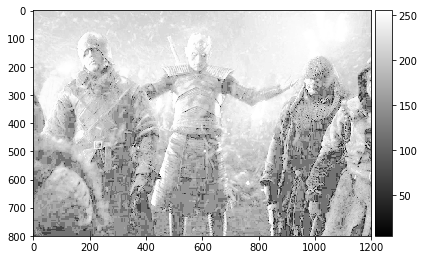

In [0]:
image_c = np.zeros([np.shape(img)[0],np.shape(img)[1]])
floored = np.floor(matrixImage)

for i in range(len(floored)):
  for j in range(len(floored[i])):
    before = int(floored[i][j])
    percentile = CDF[before]
    desire = (percentile**(1/3))*255
    image_c[i][j] = desire
io.imshow(image_c, cmap = 'gray')

Text(0, 0.5, 'Frequency')

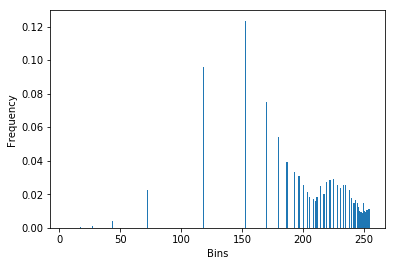

In [0]:
flatten_c = image_c.ravel()
hist_c,bins_c = np.histogram(flatten_c, bins = 255, density  = True)
plt.hist(flatten_c,bins = 255, density = True ,label = 'Manipulated Histogram')
#PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')

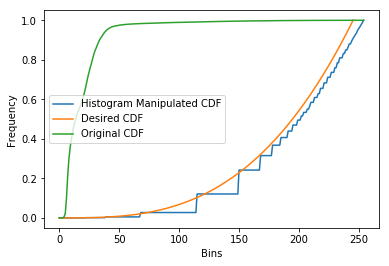

In [0]:
CDF_c = np.cumsum(hist_c/np.sum(hist_c))
plt.plot(CDF_c, label = 'Histogram Manipulated CDF')
x_c = np.linspace(gmin,gmax)
y_c = (x_c/gmax)**3
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x_c,y_c, label = 'Desired CDF')
CDF = np.cumsum(hist/np.sum(hist))
plt.plot(CDF, label ='Original CDF')
plt.legend()

#Sin

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


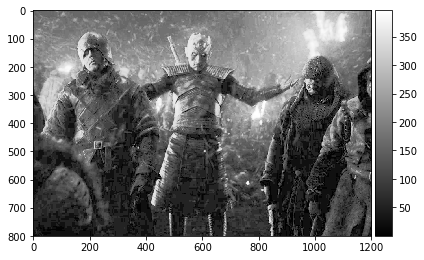

In [0]:
image_sin = np.zeros([np.shape(img)[0],np.shape(img)[1]])
floored = np.floor(matrixImage)

for i in range(len(floored)):
  for j in range(len(floored[i])):
    before = int(floored[i][j])
    percentile = CDF[before]
    desire = (np.arcsin(percentile))*255
    image_sin[i][j] = desire
io.imshow(image_sin, cmap = 'gray')

Text(0, 0.5, 'Frequency')

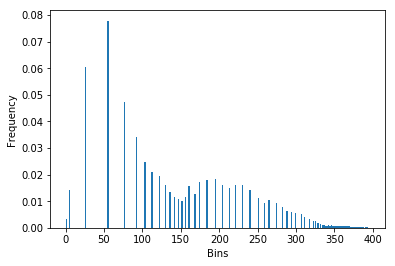

In [0]:
flatten_sin = image_sin.ravel()
hist_sin,bins_sin= np.histogram(flatten_sin, bins = 255, density  = True)
plt.hist(flatten_sin,bins = 255, density = True ,label = 'Manipulated Histogram')
#PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')

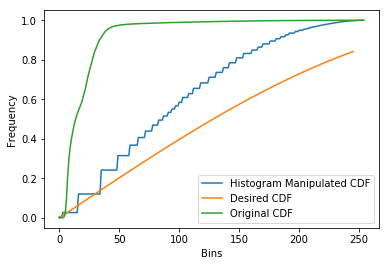

In [0]:
CDF_sin = np.cumsum(hist_sin/np.sum(hist_sin))
plt.plot(CDF_sin, label = 'Histogram Manipulated CDF')
x_sin = np.linspace(gmin,gmax)
y_sin = np.sin(x/gmax)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x_sin,y_sin, label = 'Desired CDF')
CDF = np.cumsum(hist/np.sum(hist))
plt.plot(CDF, label ='Original CDF')
plt.legend()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


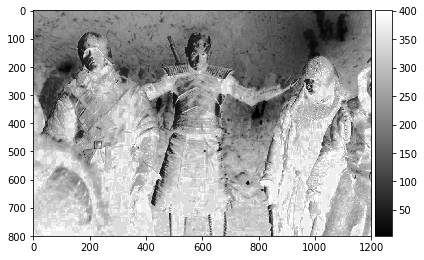

In [0]:
image_cos = np.zeros([np.shape(img)[0],np.shape(img)[1]])
floored = np.floor(matrixImage)

for i in range(len(floored)):
  for j in range(len(floored[i])):
    before = int(floored[i][j])
    percentile = CDF[before]
    desire = (np.arccos(percentile))*255
    image_cos[i][j] = desire
io.imshow(image_cos, cmap = 'gray')

Text(0, 0.5, 'Frequency')

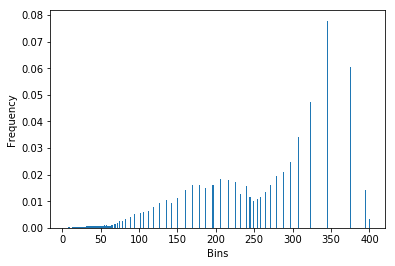

In [0]:
flatten_cos = image_cos.ravel()
hist_cos,bins_cos = np.histogram(flatten_cos, bins = 255, density  = True)
plt.hist(flatten_cos,bins = 255, density = True ,label = 'Manipulated Histogram')
#PDF = (hist-hist.min())/(hist.max()-hist.min())
plt.xlabel('Bins')
plt.ylabel('Frequency')

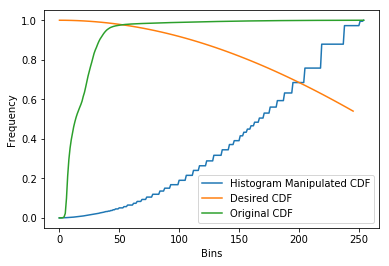

In [0]:
CDF_cos = np.cumsum(hist_cos/np.sum(hist_cos))
plt.plot(CDF_cos, label = 'Histogram Manipulated CDF')
x_cos = np.linspace(gmin,gmax)
y_cos = np.cos(x/gmax)
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.plot(x_cos,y_cos, label = 'Desired CDF')
CDF = np.cumsum(hist/np.sum(hist))
plt.plot(CDF, label ='Original CDF')
plt.legend()